In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('resources/cancer_classification.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


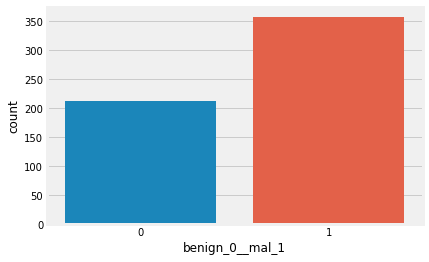

In [10]:
sns.countplot(x='benign_0__mal_1',data=df)

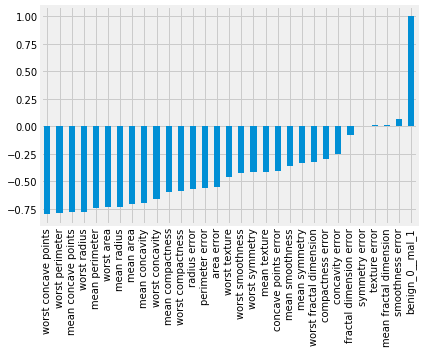

In [14]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

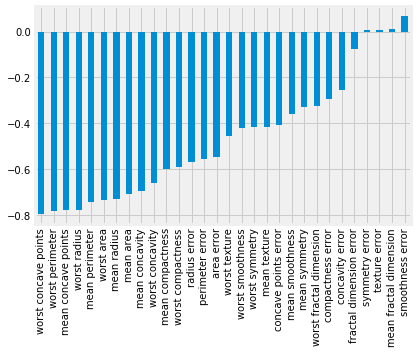

In [15]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

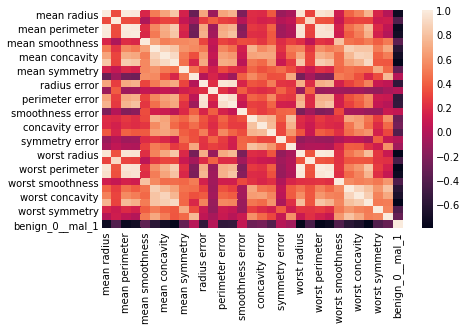

In [16]:
sns.heatmap(df.corr())

In [17]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
X_test = scaler.transform(X_test)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [25]:
X_train.shape

(426, 30)

In [26]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


# BINARY CLASSIFICATION! (so we use sigmoid)
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [27]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6655 - val_loss: 0.6432
Epoch 2/600
426/426 [==============================] - 0s 98us/sample - loss: 0.6252 - val_loss: 0.6034
Epoch 3/600
426/426 [==============================] - 0s 91us/sample - loss: 0.5838 - val_loss: 0.5628
Epoch 4/600
426/426 [==============================] - 0s 98us/sample - loss: 0.5392 - val_loss: 0.5150
Epoch 5/600
426/426 [==============================] - 0s 94us/sample - loss: 0.4897 - val_loss: 0.4644
Epoch 6/600
426/426 [==============================] - 0s 96us/sample - loss: 0.4397 - val_loss: 0.4132
Epoch 7/600
426/426 [==============================] - 0s 96us/sample - loss: 0.3925 - val_loss: 0.3654
Epoch 8/600
426/426 [==============================] - 0s 94us/sample - loss: 0.3513 - val_loss: 0.3283
Epoch 9/600
426/426 [==============================] - 0s 91us/sample - loss: 0.3173 - val_loss: 0.2924
Epoch 10/600
426/42

426/426 [==============================] - 0s 93us/sample - loss: 0.0422 - val_loss: 0.1468
Epoch 156/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0434 - val_loss: 0.1220
Epoch 157/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0468 - val_loss: 0.1274
Epoch 158/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0465 - val_loss: 0.1250
Epoch 159/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0562 - val_loss: 0.1282
Epoch 160/600
426/426 [==============================] - 0s 97us/sample - loss: 0.0498 - val_loss: 0.1409
Epoch 161/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0531 - val_loss: 0.1150
Epoch 162/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0526 - val_loss: 0.1464
Epoch 163/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0424 - val_loss: 0.1171
Epoch 164/600
426/426 [==============================] -

426/426 [==============================] - 0s 105us/sample - loss: 0.0352 - val_loss: 0.1293
Epoch 233/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0359 - val_loss: 0.1457
Epoch 234/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0349 - val_loss: 0.1312
Epoch 235/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0350 - val_loss: 0.1345
Epoch 236/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0358 - val_loss: 0.1431
Epoch 237/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0343 - val_loss: 0.1295
Epoch 238/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0364 - val_loss: 0.1412
Epoch 239/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0381 - val_loss: 0.1330
Epoch 240/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0360 - val_loss: 0.1332
Epoch 241/600
426/426 [==============================] - 0s

426/426 [==============================] - 0s 112us/sample - loss: 0.0285 - val_loss: 0.1361
Epoch 310/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0288 - val_loss: 0.1380
Epoch 311/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0302 - val_loss: 0.1356
Epoch 312/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0288 - val_loss: 0.1403
Epoch 313/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0368 - val_loss: 0.1291
Epoch 314/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0368 - val_loss: 0.1436
Epoch 315/600
426/426 [==============================] - 0s 93us/sample - loss: 0.0286 - val_loss: 0.1353
Epoch 316/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0291 - val_loss: 0.1312
Epoch 317/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0278 - val_loss: 0.1444
Epoch 318/600
426/426 [==============================] - 

Epoch 463/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0221 - val_loss: 0.1469
Epoch 464/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0220 - val_loss: 0.1401
Epoch 465/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0269 - val_loss: 0.1391
Epoch 466/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0208 - val_loss: 0.1595
Epoch 467/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0183 - val_loss: 0.1434
Epoch 468/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0180 - val_loss: 0.1542
Epoch 469/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0190 - val_loss: 0.1561
Epoch 470/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0180 - val_loss: 0.1503
Epoch 471/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0212 - val_loss: 0.1657
Epoch 472/600
426/426 [===================

Epoch 540/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0172 - val_loss: 0.1480
Epoch 541/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0147 - val_loss: 0.1663
Epoch 542/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0174 - val_loss: 0.1632
Epoch 543/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0142 - val_loss: 0.1517
Epoch 544/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0140 - val_loss: 0.1564
Epoch 545/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0137 - val_loss: 0.1645
Epoch 546/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0152 - val_loss: 0.1685
Epoch 547/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0148 - val_loss: 0.1624
Epoch 548/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0147 - val_loss: 0.1650
Epoch 549/600
426/426 [================

In [28]:
losses = pd.DataFrame(model.history.history)

In [29]:
losses.head()

,loss,val_loss
0,0.665485,0.643213
1,0.625216,0.603384
2,0.583835,0.562761
3,0.539209,0.514986
4,0.489740,0.464386


<Figure size 432x288 with 0 Axes>

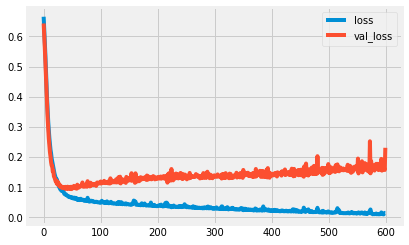

In [41]:
plt.figure()
losses.plot()

In [44]:
#trying again with early stopping

model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


# BINARY CLASSIFICATION! (so we use sigmoid)
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
# help(EarlyStopping)

In [48]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [49]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6796 - val_loss: 0.6639
Epoch 2/600
426/426 [==============================] - 0s 108us/sample - loss: 0.6508 - val_loss: 0.6370
Epoch 3/600
426/426 [==============================] - 0s 115us/sample - loss: 0.6208 - val_loss: 0.6008
Epoch 4/600
426/426 [==============================] - 0s 112us/sample - loss: 0.5804 - val_loss: 0.5513
Epoch 5/600
426/426 [==============================] - 0s 116us/sample - loss: 0.5296 - val_loss: 0.4961
Epoch 6/600
426/426 [==============================] - 0s 110us/sample - loss: 0.4777 - val_loss: 0.4431
Epoch 7/600
426/426 [==============================] - 0s 112us/sample - loss: 0.4262 - val_loss: 0.3928
Epoch 8/600
426/426 [==============================] - 0s 115us/sample - loss: 0.3773 - val_loss: 0.3422
Epoch 9/600
426/426 [==============================] - 0s 110us/sample - loss: 0.3332 - val_loss: 0.3038
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0531 - val_loss: 0.1089
Epoch 79/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0527 - val_loss: 0.1091
Epoch 80/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0531 - val_loss: 0.1053
Epoch 81/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0534 - val_loss: 0.1110
Epoch 00081: early stopping


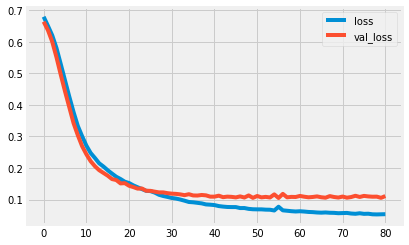

In [51]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [52]:
from tensorflow.keras.layers import Dropout

In [54]:
#trying again with early stopping & Dropout layers

model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(.5))


# BINARY CLASSIFICATION! (so we use sigmoid)
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [57]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7179 - val_loss: 0.6666
Epoch 2/600
426/426 [==============================] - 0s 105us/sample - loss: 0.6839 - val_loss: 0.6597
Epoch 3/600
426/426 [==============================] - 0s 105us/sample - loss: 0.6591 - val_loss: 0.6430
Epoch 4/600
426/426 [==============================] - 0s 112us/sample - loss: 0.6324 - val_loss: 0.6168
Epoch 5/600
426/426 [==============================] - 0s 110us/sample - loss: 0.6146 - val_loss: 0.5891
Epoch 6/600
426/426 [==============================] - 0s 126us/sample - loss: 0.5948 - val_loss: 0.5579
Epoch 7/600
426/426 [==============================] - 0s 103us/sample - loss: 0.5692 - val_loss: 0.5326
Epoch 8/600
426/426 [==============================] - 0s 103us/sample - loss: 0.5675 - val_loss: 0.5112
Epoch 9/600
426/426 [==============================] - 0s 108us/sample - loss: 0.5395 - val_loss: 0.4869
Epoch 10/60

426/426 [==============================] - 0s 98us/sample - loss: 0.1141 - val_loss: 0.0888
Epoch 79/600
426/426 [==============================] - 0s 105us/sample - loss: 0.1173 - val_loss: 0.0895
Epoch 80/600
426/426 [==============================] - 0s 94us/sample - loss: 0.1216 - val_loss: 0.0866
Epoch 81/600
426/426 [==============================] - 0s 105us/sample - loss: 0.1258 - val_loss: 0.0902
Epoch 82/600
426/426 [==============================] - 0s 96us/sample - loss: 0.1253 - val_loss: 0.0921
Epoch 83/600
426/426 [==============================] - 0s 96us/sample - loss: 0.1150 - val_loss: 0.0832
Epoch 84/600
426/426 [==============================] - 0s 101us/sample - loss: 0.1169 - val_loss: 0.0881
Epoch 85/600
426/426 [==============================] - 0s 96us/sample - loss: 0.1014 - val_loss: 0.0885
Epoch 86/600
426/426 [==============================] - 0s 101us/sample - loss: 0.1394 - val_loss: 0.0885
Epoch 87/600
426/426 [==============================] - 0s 98us/

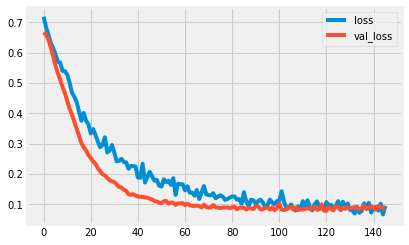

In [58]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [59]:
model.predict_classes(X_test)

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [60]:
predictions = model.predict_classes(X_test)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [63]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
